In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import corner
%matplotlib inline

In [335]:
data_path = '/mnt/ceph/users/wwong/GWProject/JaxGW/RealtimePE/ppPlots/injection_203.npz'
data = np.load(data_path)
chains = data['chains']
true_param = data['true_param']
print(true_param)
print(data['local_accs'].mean(),data['global_accs'].mean(),data['log_prob'].mean())
print(data['true_log_prob'])

[ 3.40979325e+01  2.45388759e-01 -1.00265932e-01  2.25096589e-01
  7.56303706e+02  8.18942360e-02  1.19036560e+00  1.31411074e+00
  2.02418843e+00  3.65204542e+00 -6.61721882e-01]
0.00428 0.00176 804.5702769247524
806.7223827358287


In [336]:
q_axis = np.linspace(0.1,1,10000)
eta = q_axis/(1+q_axis)**2
q_interp = interp1d(eta,q_axis)
true_param[1] = q_interp(true_param[1])
true_param[7] = np.cos(true_param[7])
true_param[10] = np.sin(true_param[10])

In [337]:
true_param[7]

0.2538761253371305

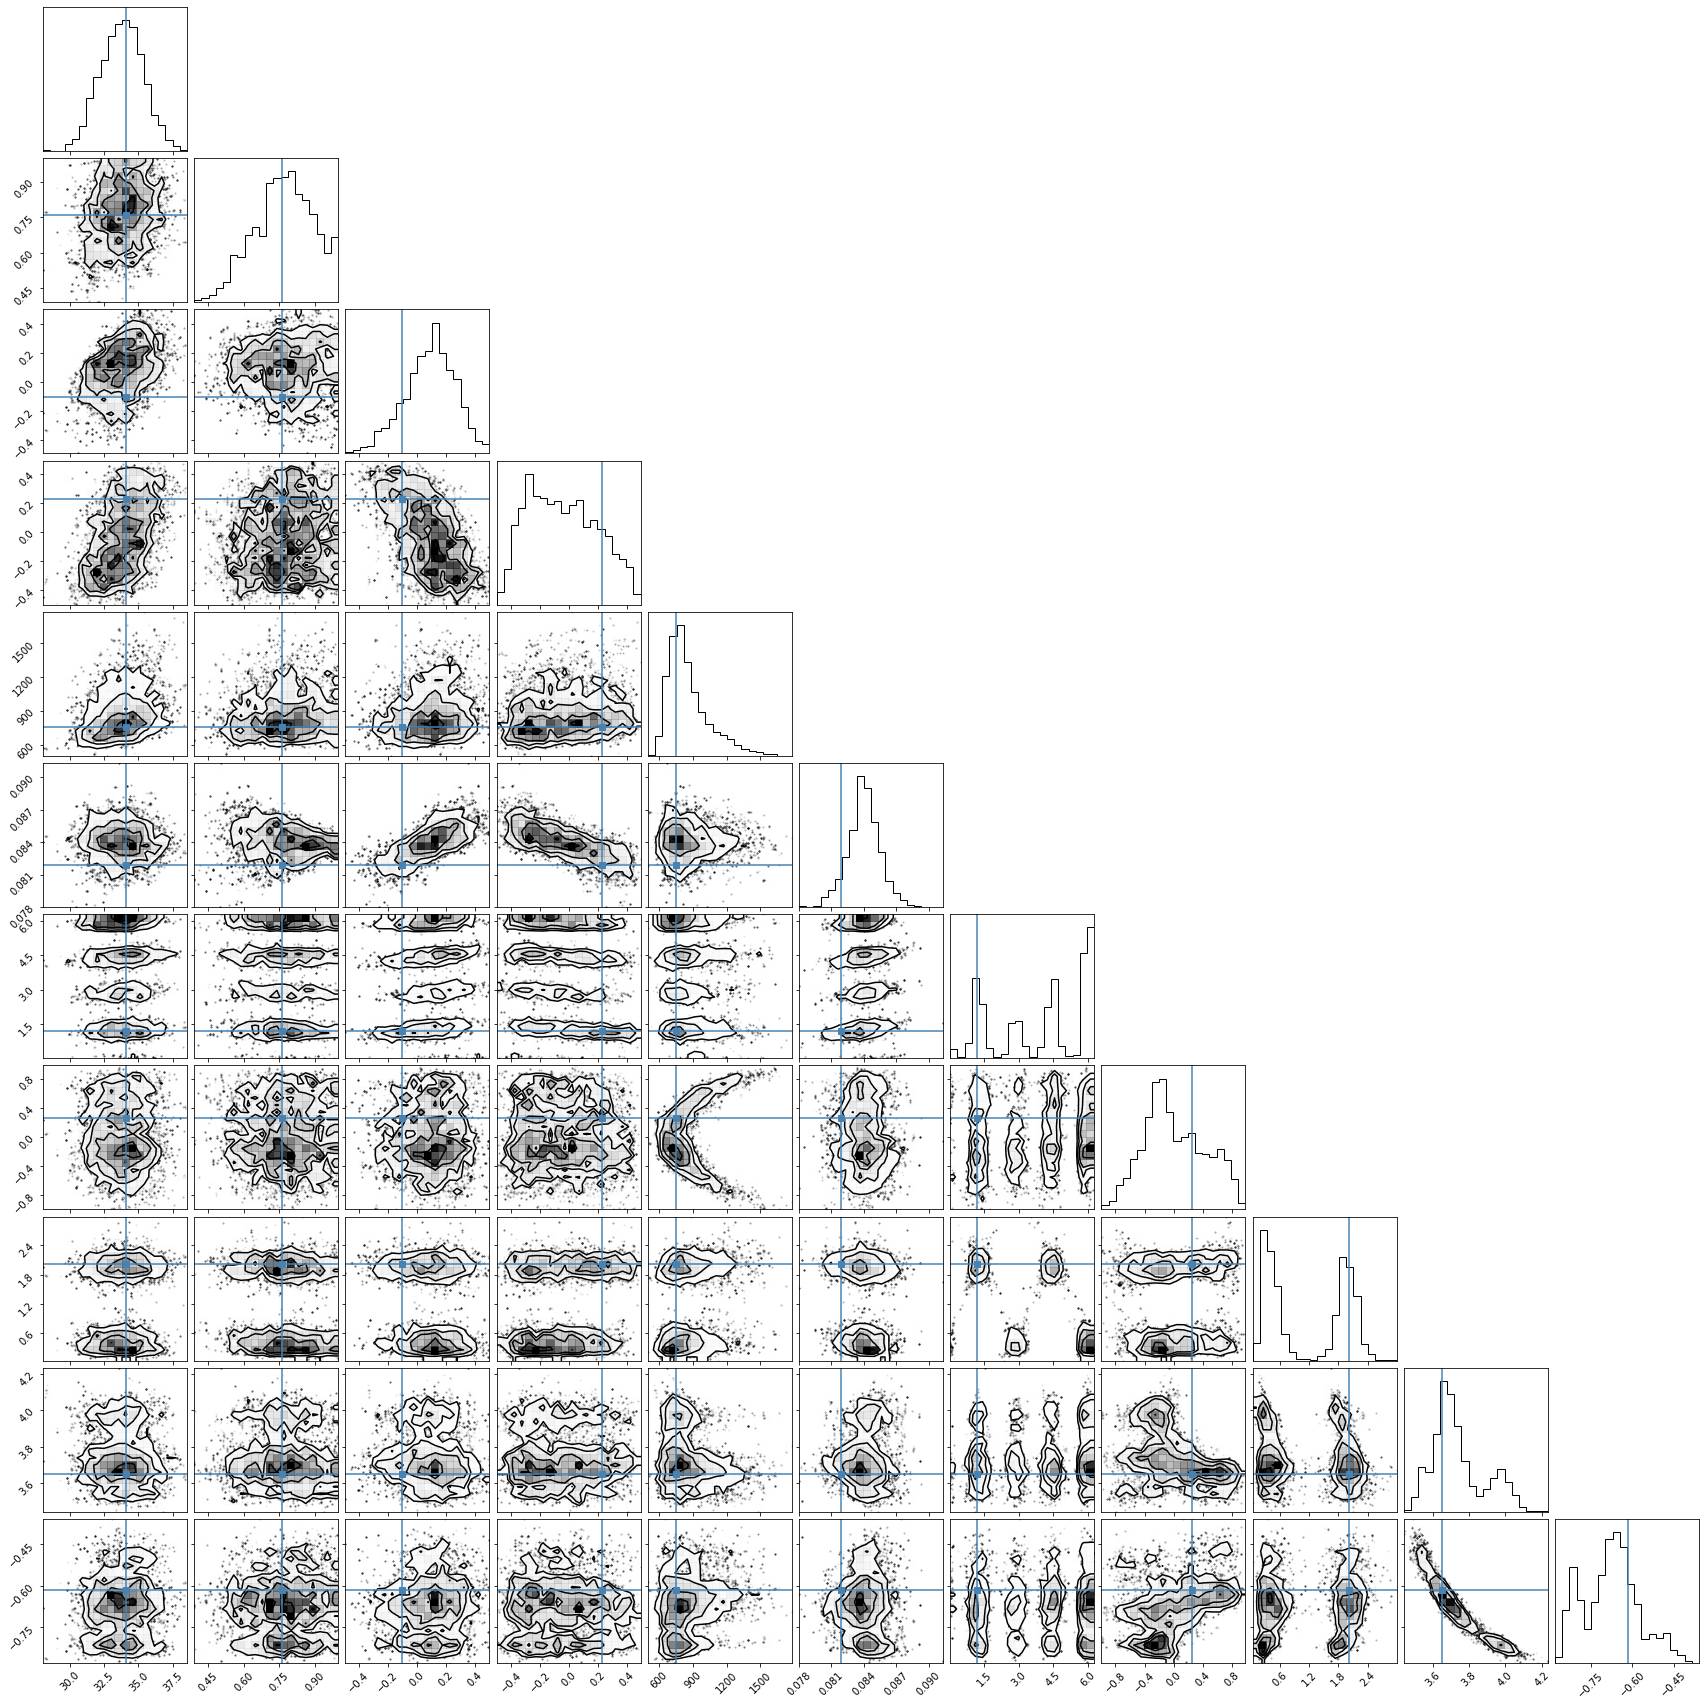

In [338]:
fig = corner.corner(chains.reshape(-1,11)[::10],truths=true_param)